In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix ,precision_recall_curve ,auc
from sklearn.model_selection import KFold ,cross_val_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns' ,27)
pd.options.display.max_columns =100

In [4]:
df = pd.read_csv(r"D:\AnacondaProjects\EmployeePerformance\data\processed\train_encoded.csv")

print(df.shape)
df.head(2)

(1200, 11)


,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpEnvironmentSatisfaction,EmpDepartment,DistanceFromHome,OverTime,EmpHourlyRate,EmpWorkLifeBalance,TrainingTimesLastYear,NumCompaniesWorked,PerformanceRating
0,12,0,4,5,10,0,55,2,2,1,1
1,12,1,4,5,14,0,42,3,2,2,1


### Define predictor(X) and target(y) variables

In [5]:
X1= df.loc[:,df.columns != 'PerformanceRating']
y1= df['PerformanceRating']

### Handling Imbalanced data via SMOTETomek technique

In [6]:
from imblearn.combine import SMOTETomek
smk =SMOTETomek(random_state=42)
X, y = smk.fit_sample(X1,y1)

print(X.shape)
print(y.shape)

(2602, 10)
(2602,)


## Modelling

In [7]:
#prepare models

models=[]

models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('XGBoost',XGBClassifier()))
models.append(('RF',RandomForestClassifier()))

score='accuracy'
results=[]
names=[]

for n ,m in models:
    kfold = KFold(n_splits=10 , random_state=10)
    
    cv_results = cross_val_score(m ,X,y,scoring=score,cv=kfold ) # m :model (model ,X,y,scoring,cv)
    results.append(cv_results)
    names.append(n)
    
    msg ="%s : %f (%f) " % (n,cv_results.mean(),cv_results.std())
    print(msg)

KNN : 0.808376 (0.161758) 
CART : 0.911253 (0.039843) 
SVM : 0.677623 (0.143332) 
XGBoost : 0.918159 (0.042312) 
RF : 0.940072 (0.032600) 


[Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'XGBoost'),
 Text(0, 0, 'RF')]

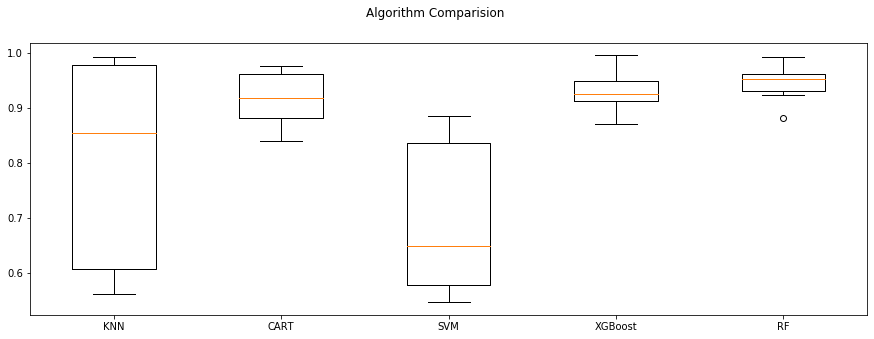

In [12]:
#boxplot algorithm comparision
rcParams['figure.figsize'] =15,5
fig=plt.figure()
fig.suptitle("Algorithm Comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## KFold CrossValidation

In [8]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=12,shuffle=True, random_state=45) 
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]


print(X_train.shape)
print(y_train.shape)

(2386, 10)
(2386,)


## XGBClassifier based on SelectKBest

In [11]:
model_XGB_SKB = XGBClassifier(booster='gbtree',
                             learning_rate=0.1,
                             n_estimators=1000,
                             max_depth=15,
                             random_state=100)
model_XGB_SKB.fit(X_train,y_train)


XGBClassifier(max_depth=15, n_estimators=1000, objective='multi:softprob',
              random_state=100)

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth= 15, n_estimators= 1000,min_samples_split=4 ,random_state=46)

model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=1000,
                       random_state=46)

## Saving the model using Pickle

In [13]:
filename = 'model_XGB_SKB.sav'
pickle.dump(model_XGB_SKB, open(filename, 'wb'))

NameError: name 'pickle' is not defined

In [62]:
filename = 'model_rf.sav'
pickle.dump(model_rf, open(filename, 'wb'))